In [1]:
install.packages("Deriv")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(Deriv)

In [3]:
options(repr.plot.width = 6, repr.plot.height = 3.5)

In [4]:
f <- function(x) {
    10
}
Deriv(f)

function (x) 
0

In [5]:
f <- function(x) {
    x*2
}
Deriv(f)

function (x) 
2

In [7]:
f <- function(x) {
    x**2
}
result <- Deriv(f)
result

function (x) 
2 * x

In [8]:
result(2)

[1] 4

In [9]:
f <- function(x, y) {
      sin(x) * cos(y)
  }
result <- Deriv(f)
result

function (x, y) 
c(x = cos(x) * cos(y), y = -(sin(x) * sin(y)))

In [11]:
Deriv(~ f(x,y), "x")

cos(x) * cos(y)

In [12]:
Deriv(~ f(x,y), c("x", "y"))

c(x = cos(x) * cos(y), y = -(sin(x) * sin(y)))

In [13]:
# comment - Part 2 Solving Differential Equations

In [14]:
install.packages(c("deSolve", "ggplot2", "rmarkdown"))

also installing the dependencies ‘isoband’, ‘rlang’, ‘tinytex’, ‘xfun’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
# include in current notebook with library(...)
library(ggplot2)
library(rmarkdown)
library(deSolve)

In [17]:
time_interval <- seq(0, 9, by = 1)
time_interval

[1] 0 1 2 3 4 5 6 7 8 9

In [18]:
state <- c(x = 0)

In [19]:
parameters <- c()

In [20]:
model_fn <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- 3
        
        return (list(dx))
    })
}

In [22]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)
head(result, 10)

time,x
0,0
1,3
2,6
3,9
4,12
5,15
6,18
7,21
8,24
9,27


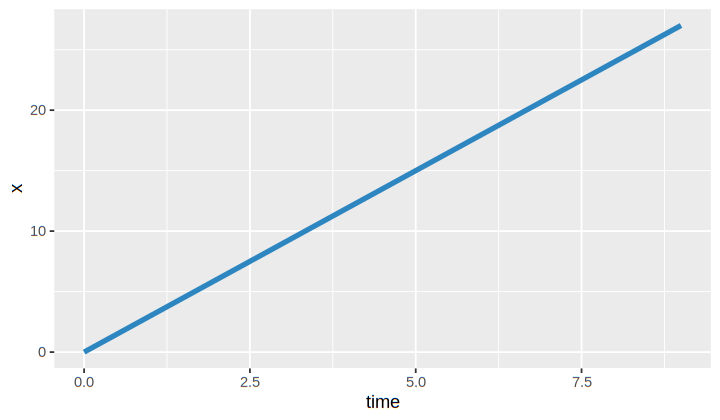

In [24]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) +
        geom_line(color = "#2E86C1", size = 1.5)
plot

In [25]:
# ODE #2

In [26]:
time_interval <- seq(0, 9, by = 1)

state <- c(x = 3)

parameters <- c()

model_fn_2 <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- 3*t
        
        return (list(dx))
    })
}

result <- ode(y = state, times = time_interval, func = model_fn_2, parms = parameters)
head(result, 1000)

time,x
0,3.000000
1,4.500003
2,9.000003
3,16.500003
4,27.000003
5,40.500003
6,57.000003
7,76.500003
8,99.000003
9,124.500003


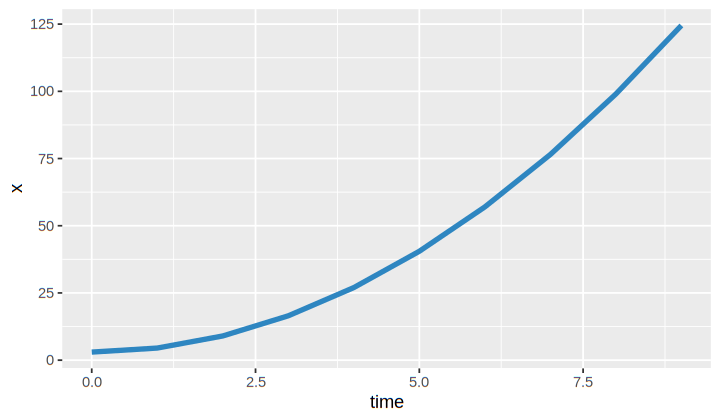

In [27]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) +
        geom_line(color = "#2E86C1", size = 1.5)
plot

In [28]:
# ODE #3 - Adding parameters

time_interval <- seq(0, 9, by = 1)

state <- c(x = 3)

parameters <- c(k = 50)

model_fn_3 <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- t*t + k
        
        return (list(dx))
    })
}

result <- ode(y = state, times = time_interval, func = model_fn_3, parms = parameters)
head(result, 1000)

time,x
0,3.00000
1,53.33333
2,105.66666
3,161.99999
4,224.33333
5,294.66666
6,374.99999
7,467.33333
8,573.66666
9,695.99999


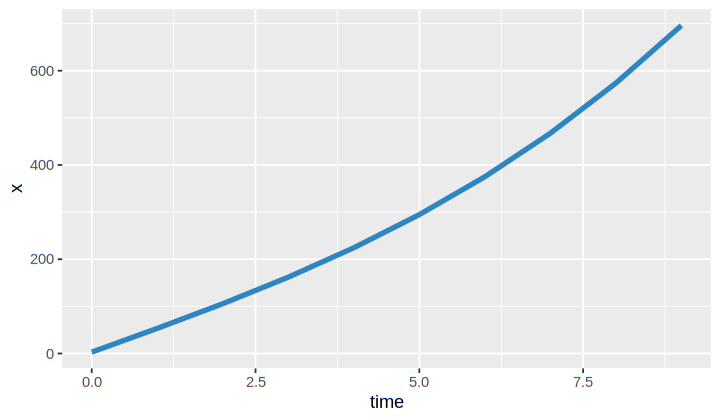

In [29]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) +
        geom_line(color = "#2E86C1", size = 1.5)
plot